In [1]:
import omnipath as op
import pandas as pd
import json
import matplotlib.pyplot as plt

# Get All Interactions From OmniPath
output = op.interactions.AllInteractions()
allInteractions = output.get()

# Get Dict from Protein to Genes
proteinToGene = pd.read_csv('./proteinToGene.tsv', sep='\t')
proteinToGene = proteinToGene.set_index("To")
dictProteinToGene = proteinToGene.to_dict()["From"]

####################################################################
# Get Dict of Source and their Targets
####################################################################

totalDict = allInteractions.groupby('target').apply(lambda dfg: dfg.drop('target', axis=1).to_dict(orient='list')).to_dict()
jsonDict = json.dumps(totalDict, sort_keys=True, indent=4)

####################################################################
# Select Genes To Show (Algorithm)
####################################################################
RUNS = 1
selectedGenes = ["Q8WXX7"]
try:
    labelFile = dictProteinToGene["Q8WXX7"]
except:
    labelFile = ""

for run in range(RUNS):
    tempGenes = []
    for gene in selectedGenes:
        try:
            tempGenes += totalDict[gene]["source"]
            # print(f"Getting targets of {gene}")
        except Exception as e:
            RUNS = RUNS
            # print(f"Skipped {gene}")
        # print(tempGenes)
        # print("")
    selectedGenes += tempGenes
    # selectedGenes = list(dict.fromkeys(selectedGenes))
    print(len(selectedGenes))

print("\n Final Selected Genes:")
print(selectedGenes)

print(len(selectedGenes))
removeDuplicates = list(dict.fromkeys(selectedGenes))
print(len(removeDuplicates))

####################################################################
# Transform Protein Dataframe to Gene Dataframe
####################################################################
def transformToGeneDF(proteinDF):
    sourceNames = list(proteinDF["source"])
    sourceNewNames = []

    targetNames = list(proteinDF["target"])
    targetNewNames = []

    for name in sourceNames:
        try:
            sourceNewNames.append(dictProteinToGene[str(name)])
        except:
            sourceNewNames.append(name)
    
    for name in targetNames:
        try:
            targetNewNames.append(dictProteinToGene[str(name)])
        except:
            targetNewNames.append(name)

    proteinDF["source"] = sourceNewNames
    proteinDF["target"] = targetNewNames
    return proteinDF

####################################################################
# Cytoscape List
####################################################################
fallInteractions = allInteractions[allInteractions["target"].isin(removeDuplicates)]

25

 Final Selected Genes:
['Q8WXX7', 'P10275', 'Q16520', 'P49715', 'P49711', 'P03372', 'P55317', 'Q9H334', 'P23769', 'P23771', 'P41235', 'Q9H9S0', 'Q9GZV8', 'Q01196', 'P17947', 'P17542', 'Q92754', 'P04637', 'P25490', 'Q09472', 'Q92769', 'O60216', 'Q9BZS1', 'Q16650', 'O15409']
25
25


In [2]:
output = op.interactions.AllInteractions()
allInteractions = output.get()

In [11]:
allInteractions

,source,target,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,type,references_stripped,n_references,n_sources,n_primary_sources
0,P0DP25,P48995,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,11290752;11983166;12601176,3,1,1
1,P0DP23,P48995,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,11290752;11983166;12601176,3,1,1
2,P0DP24,P48995,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,11290752;11983166;12601176,3,1,1
3,Q03135,P48995,True,True,False,True,True,False,13,DIP:19897728;HPRD:12732636;IntAct:19897728;Lit...,DIP;HPRD;IntAct;Lit-BM-17;TRIP,post_translational,10980191;12732636;14551243;16822931;18430726;1...,8,5,5
4,P14416,P48995,True,True,False,True,True,False,1,TRIP:18261457,TRIP,post_translational,18261457,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174535,5311358,P56696,True,False,False,False,False,False,1,Cellinker:16251430,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,16251430,1,2,1
174536,896,P48039,True,False,False,False,False,False,3,Cellinker:12764576;Cellinker:2991499;Cellinker...,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,12764576;2991499;9089668,3,2,1
174537,5957,Q9BPV8,True,False,False,False,False,False,1,Cellinker:12815166,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,12815166,1,2,1
174538,187,P08173,True,False,False,False,False,False,3,Cellinker:12235229;Cellinker:7651370;Cellinker...,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,12235229;7651370;9224827,3,2,1


In [12]:
allInteractions[(allInteractions["is_inhibition"] == False) & (allInteractions["is_stimulation"] == False)]

,source,target,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,type,references_stripped,n_references,n_sources,n_primary_sources
39,P06241,Q9UBN4,True,False,False,False,False,False,3,TRIP:16144838;TRIP:18048348;dbPTM:16144838,TRIP;dbPTM,post_translational,16144838;18048348,2,2,2
52,P17612,Q9Y210,True,False,False,False,False,False,4,PhosphoSite:19961855;PhosphoSite:23645677;TRIP...,PhosphoSite;TRIP,post_translational,19961855;22001259;23645677,3,2,2
57,P12931,Q9Y210,True,False,False,False,False,False,3,HPRD:14761972;ProtMapper:21471003;TRIP:14761972,HPRD;PhosphoPoint;ProtMapper;REACH_ProtMapper;...,post_translational,14761972;21471003,2,6,4
65,Q8NER1,P29474,True,False,False,False,False,False,3,ProtMapper:20674858;TRIP:21493704;TRIP:22451268,ProtMapper;Sparser_ProtMapper;TRIP,post_translational,20674858;21493704;22451268,3,3,2
86,Q9HBA0,P12931,True,False,False,False,False,False,1,HPRD:12538589,HPRD;Li2012,post_translational,12538589,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174535,5311358,P56696,True,False,False,False,False,False,1,Cellinker:16251430,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,16251430,1,2,1
174536,896,P48039,True,False,False,False,False,False,3,Cellinker:12764576;Cellinker:2991499;Cellinker...,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,12764576;2991499;9089668,3,2,1
174537,5957,Q9BPV8,True,False,False,False,False,False,1,Cellinker:12815166,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,12815166,1,2,1
174538,187,P08173,True,False,False,False,False,False,3,Cellinker:12235229;Cellinker:7651370;Cellinker...,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,12235229;7651370;9224827,3,2,1


In [15]:
allInteractions[~((allInteractions["is_inhibition"] == False) & (allInteractions["is_stimulation"] == False))]

,source,target,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,type,references_stripped,n_references,n_sources,n_primary_sources
0,P0DP25,P48995,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,11290752;11983166;12601176,3,1,1
1,P0DP23,P48995,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,11290752;11983166;12601176,3,1,1
2,P0DP24,P48995,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,11290752;11983166;12601176,3,1,1
3,Q03135,P48995,True,True,False,True,True,False,13,DIP:19897728;HPRD:12732636;IntAct:19897728;Lit...,DIP;HPRD;IntAct;Lit-BM-17;TRIP,post_translational,10980191;12732636;14551243;16822931;18430726;1...,8,5,5
4,P14416,P48995,True,True,False,True,True,False,1,TRIP:18261457,TRIP,post_translational,18261457,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172728,5311,Q9BY41,True,False,True,True,False,True,1,SIGNOR:17868033,CancerDrugsDB;SIGNOR,small_molecule_protein,17868033,1,2,2
172729,5736,P08908,True,False,True,True,False,True,1,SIGNOR:8935801,SIGNOR,small_molecule_protein,8935801,1,1,1
172730,5736,P23975,True,False,True,True,False,True,1,SIGNOR:20223878,SIGNOR,small_molecule_protein,20223878,1,1,1
172731,738,Q9UI32,True,True,False,True,True,False,2,SIGNOR:22049910,SIGNOR,small_molecule_protein,22049910,1,1,1


In [13]:
dictProteinToGene["P06241"]

'FYN'

In [10]:
output = op.requests.Annotations
allRequests = output.get(proteins=["TP53"])

In [8]:
allRequests

,uniprot,genesymbol,entity_type,source,label,value,record_id
0,P04637,TP53,protein,HumanCellMap,localization,centrosome enriched,9956
1,P04637,TP53,protein,HumanCellMap,method,SAFE,9956
2,P04637,TP53,protein,HumanCellMap,localization,centrosome,9957
3,P04637,TP53,protein,HumanCellMap,method,NMF,9957
4,P04637,TP53,protein,HumanCellMap,localization,P-body enriched,9958
...,...,...,...,...,...,...,...
3995,P04637,TP53,protein,UniProt_keyword,keyword,Mitochondrion,84161
3996,P04637,TP53,protein,UniProt_keyword,keyword,Host-virus interaction,84162
3997,P04637,TP53,protein,UniProt_keyword,keyword,Li-Fraumeni syndrome,84163
3998,P04637,TP53,protein,UniProt_keyword,keyword,Disease variant,84164


In [2]:
fallInteractions

,source,target,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,type,references_stripped,n_references,n_sources,n_primary_sources
212,P18847,P04637,True,False,True,False,False,False,5,HPRD:11792711;Lit-BM-17:11792711;Lit-BM-17:159...,HPRD;Lit-BM-17;SPIKE,post_translational,11792711;15933712;16169070,3,3,3
240,Q6PL18,P03372,True,True,False,True,True,False,8,BioGRID:17998543;DIP:17998543;HPRD:17998543;In...,BioGRID;DIP;HPRD;IntAct;Lit-BM-17;SPIKE,post_translational,17998543;25640309,2,6,6
247,P04198,P04637,True,True,False,True,True,False,1,SPIKE:20145147,SPIKE,post_translational,20145147,1,1,1
249,Q6PL18,P10275,True,True,False,True,True,False,1,SPIKE:19318566,SPIKE,post_translational,19318566,1,1,1
338,Q8IW41,P04637,True,True,False,True,True,False,13,HPRD:17254968;KEA:17254968;ProtMapper:17254968...,HPRD;HPRD_KEA;HPRD_MIMP;KEA;MIMP;PhosphoSite_M...,post_translational,17254968;17624785;18568040;23685072;24818748;2...,6,18,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174106,3005573,P03372,True,False,False,False,False,False,0,NaN,CancerDrugsDB,small_molecule_protein,None,None,1,1
174297,5870,P03372,True,False,False,False,False,False,1,Cellinker:9048584,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,9048584,1,2,1
174302,5757,P03372,True,False,False,False,False,False,1,Cellinker:9048584,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,9048584,1,2,1
174341,5756,P03372,True,False,False,False,False,False,1,Cellinker:9048584,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,9048584,1,2,1


In [10]:
def transformToGeneDF(proteinDF):
    sourceNames = list(proteinDF["source"])
    sourceNewNames = []

    targetNames = list(proteinDF["target"])
    targetNewNames = []

    for name in sourceNames:
        try:
            sourceNewNames.append(dictProteinToGene[str(name)])
        except:
            sourceNewNames.append(name)
    
    for name in targetNames:
        try:
            targetNewNames.append(dictProteinToGene[str(name)])
        except:
            targetNewNames.append(name)

    proteinDF["source"] = sourceNewNames
    proteinDF["target"] = targetNewNames
    return proteinDF

In [11]:
fallInteractions = transformToGeneDF(fallInteractions)

/var/folders/ts/m7c_798d70q3whk59gstkgz00000gn/T/ipykernel_4622/3868307830.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proteinDF["source"] = sourceNewNames
/var/folders/ts/m7c_798d70q3whk59gstkgz00000gn/T/ipykernel_4622/3868307830.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proteinDF["target"] = targetNewNames


In [12]:
fallInteractions

,source,target,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,type,references_stripped,n_references,n_sources,n_primary_sources
212,ATF3,TP53,True,False,True,False,False,False,5,HPRD:11792711;Lit-BM-17:11792711;Lit-BM-17:159...,HPRD;Lit-BM-17;SPIKE,post_translational,11792711;15933712;16169070,3,3,3
240,ATAD2,ESR1,True,True,False,True,True,False,8,BioGRID:17998543;DIP:17998543;HPRD:17998543;In...,BioGRID;DIP;HPRD;IntAct;Lit-BM-17;SPIKE,post_translational,17998543;25640309,2,6,6
247,MYCN,TP53,True,True,False,True,True,False,1,SPIKE:20145147,SPIKE,post_translational,20145147,1,1,1
249,ATAD2,AR,True,True,False,True,True,False,1,SPIKE:19318566,SPIKE,post_translational,19318566,1,1,1
338,MAPKAPK5,TP53,True,True,False,True,True,False,13,HPRD:17254968;KEA:17254968;ProtMapper:17254968...,HPRD;HPRD_KEA;HPRD_MIMP;KEA;MIMP;PhosphoSite_M...,post_translational,17254968;17624785;18568040;23685072;24818748;2...,6,18,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174106,3005573,ESR1,True,False,False,False,False,False,0,NaN,CancerDrugsDB,small_molecule_protein,None,None,1,1
174297,5870,ESR1,True,False,False,False,False,False,1,Cellinker:9048584,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,9048584,1,2,1
174302,5757,ESR1,True,False,False,False,False,False,1,Cellinker:9048584,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,9048584,1,2,1
174341,5756,ESR1,True,False,False,False,False,False,1,Cellinker:9048584,Cellinker;Guide2Pharma_Cellinker,small_molecule_protein,9048584,1,2,1


In [69]:
allInteractions.sort_values(by=['n_sources'])

,source,target,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,type,references_stripped,n_references,n_sources,n_primary_sources
0,CALM3,TRPC1,True,False,True,True,False,True,3,TRIP:11290752;TRIP:11983166;TRIP:12601176,TRIP,post_translational,11290752;11983166;12601176,3,1,1
71025,HLA-DRB1,PRKCQ,True,True,False,True,True,False,0,NaN,Wang,post_translational,None,None,1,1
71024,LTK,ALPP,True,False,True,True,False,True,0,NaN,Wang,post_translational,None,None,1,1
71023,MYBL2,HSPA1A,True,True,False,True,True,False,0,NaN,Wang,post_translational,None,None,1,1
71022,MAPK9,APOF,True,True,False,True,True,False,0,NaN,Wang,post_translational,None,None,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,IGF1,IGF1R,True,True,False,True,True,False,27,Baccin2019:1852007;Baccin2019:2877871;CA1:8408...,Baccin2019;CA1;CellCall;CellChatDB;CellPhoneDB...,post_translational,11287679;12067807;14604834;185;1852007;1902995...,15,42,26
1184,EGF,EGFR,True,True,False,True,True,False,124,AlzPathway:18270696;Baccin2019:10788520;Baccin...,AlzPathway;BEL-Large-Corpus_ProtMapper;Baccin2...,post_translational,10085134;10209155;10788520;10970856;11116185;1...,77,43,30
3007,HGF,MET,True,True,False,True,True,False,54,Baccin2019:15167892;Baccin2019:1655405;Baccin2...,BEL-Large-Corpus_ProtMapper;Baccin2019;BioGRID...,post_translational,14685170;15167892;15218027;16397249;16537482;1...,23,43,26
3083,TNF,TNFRSF1B,True,True,False,True,True,False,51,Baccin2019:19084540;Baccin2019:2158863;Baccin2...,Baccin2019;BioGRID;CancerCellMap;CellCall;Cell...,post_translational,11239407;11448951;12040173;1310388;1328224;147...,25,44,30


In [34]:
allInteractions = transformToGeneDF(allInteractions)

In [35]:
import networkx as nx

In [36]:
G = nx.from_pandas_edgelist(allInteractions, source='source', target='target')

KeyboardInterrupt: 

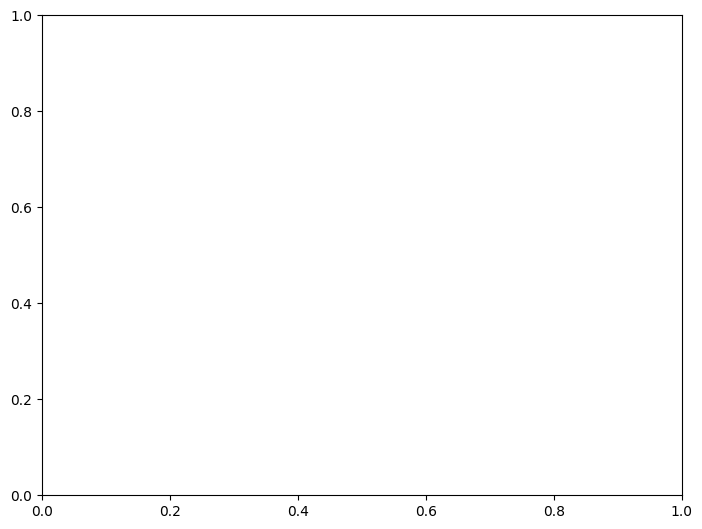

In [31]:
nx.draw(G);

In [37]:
print(G)

Graph with 18973 nodes and 165829 edges


In [38]:
print(nx.shortest_path(G, source="NRIP1", target="AUTS2"))

['NRIP1', 'AR', 'AUTS2']


In [25]:
print(nx.all_shortest_paths(G, source="NRIP1", target="AUTS2")[0])

TypeError: 'generator' object is not subscriptable

In [61]:
print([p for p in nx.all_shortest_paths(G, source="NRIP1", target="AUTS2")])

<generator object <genexpr> at 0x152f777d0>


In [70]:
tempShortPath = []
tempShortPath = [p for p in nx.all_shortest_paths(G, source="NRIP1", target="AUTS2")]
tempShortPath

[['NRIP1', 'ESR1', 'AUTS2'],
 ['NRIP1', 'EP300', 'AUTS2'],
 ['NRIP1', 'AR', 'AUTS2'],
 ['NRIP1', 'FOXA1', 'AUTS2'],
 ['NRIP1', 'PRDM14', 'AUTS2']]

In [76]:
tempShortPath = []
tempShortPaths = [p for p in nx.all_shortest_paths(G, source="NRIP1", target="AUTS2")]
for path in tempShortPaths:
    if len(path) <= 3:
        tempShortPath += path
tempShortPath = list(dict.fromkeys(tempShortPath)) 
tempShortPath

['NRIP1', 'ESR1', 'AUTS2', 'EP300', 'AR', 'FOXA1', 'PRDM14']

In [64]:
tempShortPath = []
tempShortPath = sum([p for p in nx.all_shortest_paths(G, source="NRIP1", target="AUTS2")], []) 
tempShortPath

['NRIP1',
 'ESR1',
 'AUTS2',
 'NRIP1',
 'EP300',
 'AUTS2',
 'NRIP1',
 'AR',
 'AUTS2',
 'NRIP1',
 'FOXA1',
 'AUTS2',
 'NRIP1',
 'PRDM14',
 'AUTS2']

In [66]:
tempShortPath = []
tempShortPath = list(dict.fromkeys(sum([p for p in nx.all_shortest_paths(G, source="NRIP1", target="AUTS2")], []))) 
tempShortPath

['NRIP1', 'ESR1', 'AUTS2', 'EP300', 'AR', 'FOXA1', 'PRDM14']

In [53]:
proteinToGene = pd.read_csv('./proteinToGene.tsv', sep='\t')
proteinToGene

,From,To
0,OR4F5,Q8NH21
1,OR4F5,A0A126GWG7
2,OR4F5,A0A2U3U0J3
3,OR4F29,Q6IEY1
4,OR4F16,Q6IEY1
...,...,...
144294,MT-ND4,P03905
144295,MT-ND5,P03915
144296,MT-ND6,P03923
144297,MT-CYB,P00156


In [54]:
totalDict = proteinToGene.groupby('From').apply(lambda dfg: dfg.drop('From', axis=1).to_dict(orient='list')).to_dict()

In [49]:
proteinToGene[proteinToGene["From"] == "DYRK1A"]

,From,To
137481,DYRK1A,Q13627
137482,DYRK1A,A0A2R8Y443
137483,DYRK1A,A0A2R8Y6I6
137484,DYRK1A,A0A2R8Y6L5
137485,DYRK1A,A0A2R8YDF3
137486,DYRK1A,A0A2R8YEY4
137487,DYRK1A,E7EMI5
137488,DYRK1A,N0GVR9


In [ ]:
proteinToGene[proteinToGene["From"] == "DYRK1A"]

In [42]:
proteinToGene = proteinToGene.set_index("From")
dictProteinToGene = proteinToGene.to_dict()["To"]

In [46]:
dictProteinToGene["DYRK1A"]

'N0GVR9'